In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def DBSCAN(D, epsilon, minpts):
    # find core points
    cores = []
    noise = []
    border = []
    clusters = []
    for data_point in D:
        neighbors = []
        neighbors.append(list(data_point))
        for point in D:
            distance = np.linalg.norm(data_point - point)
            if distance <= epsilon and distance > 0:
                neighbors.append(list(point))

        if len(neighbors) >= minpts+1:
            cores.append(list(data_point))
            clusters.append(neighbors)
        elif len(neighbors) == 1:
            noise.append(list(data_point))
        else:
            border.append(list(data_point))

    final_clusters = []       
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            
            final_clusters.append(common_point(clusters[i],clusters[j]))
        
    final_clusters = list(num for num,_ in itertools.groupby(sorted(final_clusters))) 
    final_clusters.append(noise)
    labels = label_c(D, final_clusters)
    return final_clusters, cores, noise, border, labels



def common_point(cluster1, cluster2):
    for ele in cluster1:
        if ele in cluster2:
            cluster1.extend(cluster2)
            cluster1.sort()
            cluster1 = list(cluster1 for cluster1,_ in itertools.groupby(cluster1))
            return cluster1
    return cluster1

def label_c(df,final_cluster):
    label=[]
    for i in range(len(df)):
        for j in final_cluster:
            if list(df[i]) in j:
                label.append(final_cluster.index(j))
    label=np.array(label)
    return label
    

In [3]:
x = [1, 3, 2.5, 1.5, 3, 2.8, 2.5, 1.2, 1, 1, 1, 5, 4]
y = [2, 4, 4, 2.5, 5, 4.5, 4.5, 2.5, 3, 5, 2.5, 6, 3]

data =np.column_stack((x, y))
final_clusters, cores, noise, border, labels = DBSCAN(data, .6, 4)
print ("final clusters:")
for cluster in final_clusters:
    print(cluster)
    
print (f"cores:\n{cores}")
print (f"outliers:\n{noise}")
print (f"border:\n{border}")
print (f"labels:\n{labels}")

final clusters:
[[1.0, 2.0], [1.0, 2.5], [1.0, 3.0], [1.2, 2.5], [1.5, 2.5]]
[[2.8, 4.5], [3.0, 4.0], [2.5, 4.0], [3.0, 5.0], [2.5, 4.5]]
[[1.0, 5.0], [5.0, 6.0], [4.0, 3.0]]
cores:
[[2.8, 4.5], [1.2, 2.5], [1.0, 2.5]]
outliers:
[[1.0, 5.0], [5.0, 6.0], [4.0, 3.0]]
border:
[[1.0, 2.0], [3.0, 4.0], [2.5, 4.0], [1.5, 2.5], [3.0, 5.0], [2.5, 4.5], [1.0, 3.0]]
labels:
[0 1 1 0 1 1 1 0 0 2 0 2 2]


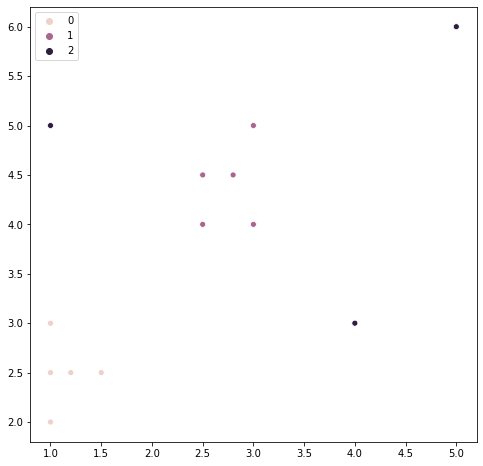

In [4]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y,hue=labels)
plt.show()